### Access GPU for faster processing

In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available and enabled:", torch.cuda.get_device_name(0))
else:
    print("GPU is not enabled. Please turn it on from Settings → Accelerator → GPU.")


GPU is available and enabled: Tesla T4


### Install the YOLO-8

In [2]:
!pip install ultralytics==8.3.228 numpy==1.26.4

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/1

### Check if YOLO-8 has been installed properly or not

In [3]:
import ultralytics
ultralytics. checks()

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6567.2/8062.4 GB disk)


### Import Dataset from Roboflow

Store data into a specific directory

In [4]:
%pwd

'/kaggle/working'

In [5]:
!mkdir RoadSignDetection

In [6]:
ls

RoadSignDetection/


In [7]:
%pwd

'/kaggle/working'

In [8]:
import os

In [9]:
os.chdir("/kaggle/working/RoadSignDetection")

In [10]:
%pwd

'/kaggle/working/RoadSignDetection'

In [11]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 38.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 4.1 MB/s eta 0:00:000:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigqu

In [12]:

from roboflow import Roboflow
rf = Roboflow(api_key="4yoquZYTUIJ8bnAkBjiP")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:00<00:00, 10834.03it/s]


### Change the path of Train, Test and Val in data.yaml

In [13]:
!pip install pyyaml

In [14]:
import yaml

yaml_path = "/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/data.yaml"

# load the YAML file
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

print("Original YAML content:")
print(data)

Original YAML content:
{'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'], 'nc': 15, 'roboflow': {'license': 'CC BY 4.0', 'project': 'self-driving-cars-lfjou', 'url': 'https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6', 'version': 6, 'workspace': 'selfdriving-car-qtywx'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [15]:
# Modify the paths
data['train'] = '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/train/images'
data['val'] = '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/valid/images'
data['test'] = '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images'


# Overwrite the same YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

print(f"data.yaml updated successfully at: {yaml_path}")

data.yaml updated successfully at: /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/data.yaml


In [16]:
yaml_path = "/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/data.yaml"

# load the YAML file
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

print("Original YAML content:")
print(data)

Original YAML content:
{'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'], 'nc': 15, 'roboflow': {'license': 'CC BY 4.0', 'project': 'self-driving-cars-lfjou', 'url': 'https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6', 'version': 6, 'workspace': 'selfdriving-car-qtywx'}, 'test': '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images', 'train': '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/train/images', 'val': '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/valid/images'}


### Train the YOLOv8 over a Custom Dataset

In [17]:
%pwd

'/kaggle/working/RoadSignDetection'

In [18]:
os.chdir("/kaggle/working/RoadSignDetection/Self-Driving-Cars-6")

In [19]:
%pwd

'/kaggle/working/RoadSignDetection/Self-Driving-Cars-6'

<!-- Table 1 -->
<h4>Task — When to Use?</h4>
<table border="1" style="border-collapse: collapse; width: 60%;">
  <tr><th>Task</th><th>When to use?</th></tr>
  <tr><td>detect</td><td>Object detection</td></tr>
  <tr><td>classify</td><td>Find a class</td></tr>
  <tr><td>segment</td><td>Generate a mask</td></tr>
</table>
<hr>

<!-- Table 2 -->
<h4>Mode — When to Use?</h4>
<table border="1" style="border-collapse: collapse; width: 60%;">
  <tr><th>Mode</th><th>When to use?</th></tr>
  <tr><td>train</td><td>Train the model on a custom dataset</td></tr>
  <tr><td>val</td><td>Validate model performance on a validation set</td></tr>
  <tr><td>predict</td><td>Evaluate model on images or videos</td></tr>
</table>
<hr>

<!-- Table 3 -->
<h4>YOLOv8 Model Types</h4>
<table border="1" style="border-collapse: collapse; width: 80%;">
  <tr><th>Model Type</th><th>Parameters (Approx.)</th><th>Device Type</th></tr>
  <tr><td>YOLOv8n</td><td>~3M</td><td>Low (CPU)</td></tr>
  <tr><td>YOLOv8s</td><td>~11M</td><td>Low–Medium (High CPU)</td></tr>
  <tr><td>YOLOv8m</td><td>~25M</td><td>Medium (mid-range GPUs)</td></tr>
  <tr><td>YOLOv8l</td><td>~40M</td><td>High</td></tr>
  <tr><td>YOLOv8x</td><td>~68M</td><td>Very High</td></tr>
</table>
<hr>


In [20]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

### Display some content

In [22]:
%pwd

'/kaggle/working/RoadSignDetection/Self-Driving-Cars-6'

In [24]:
!ls '/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


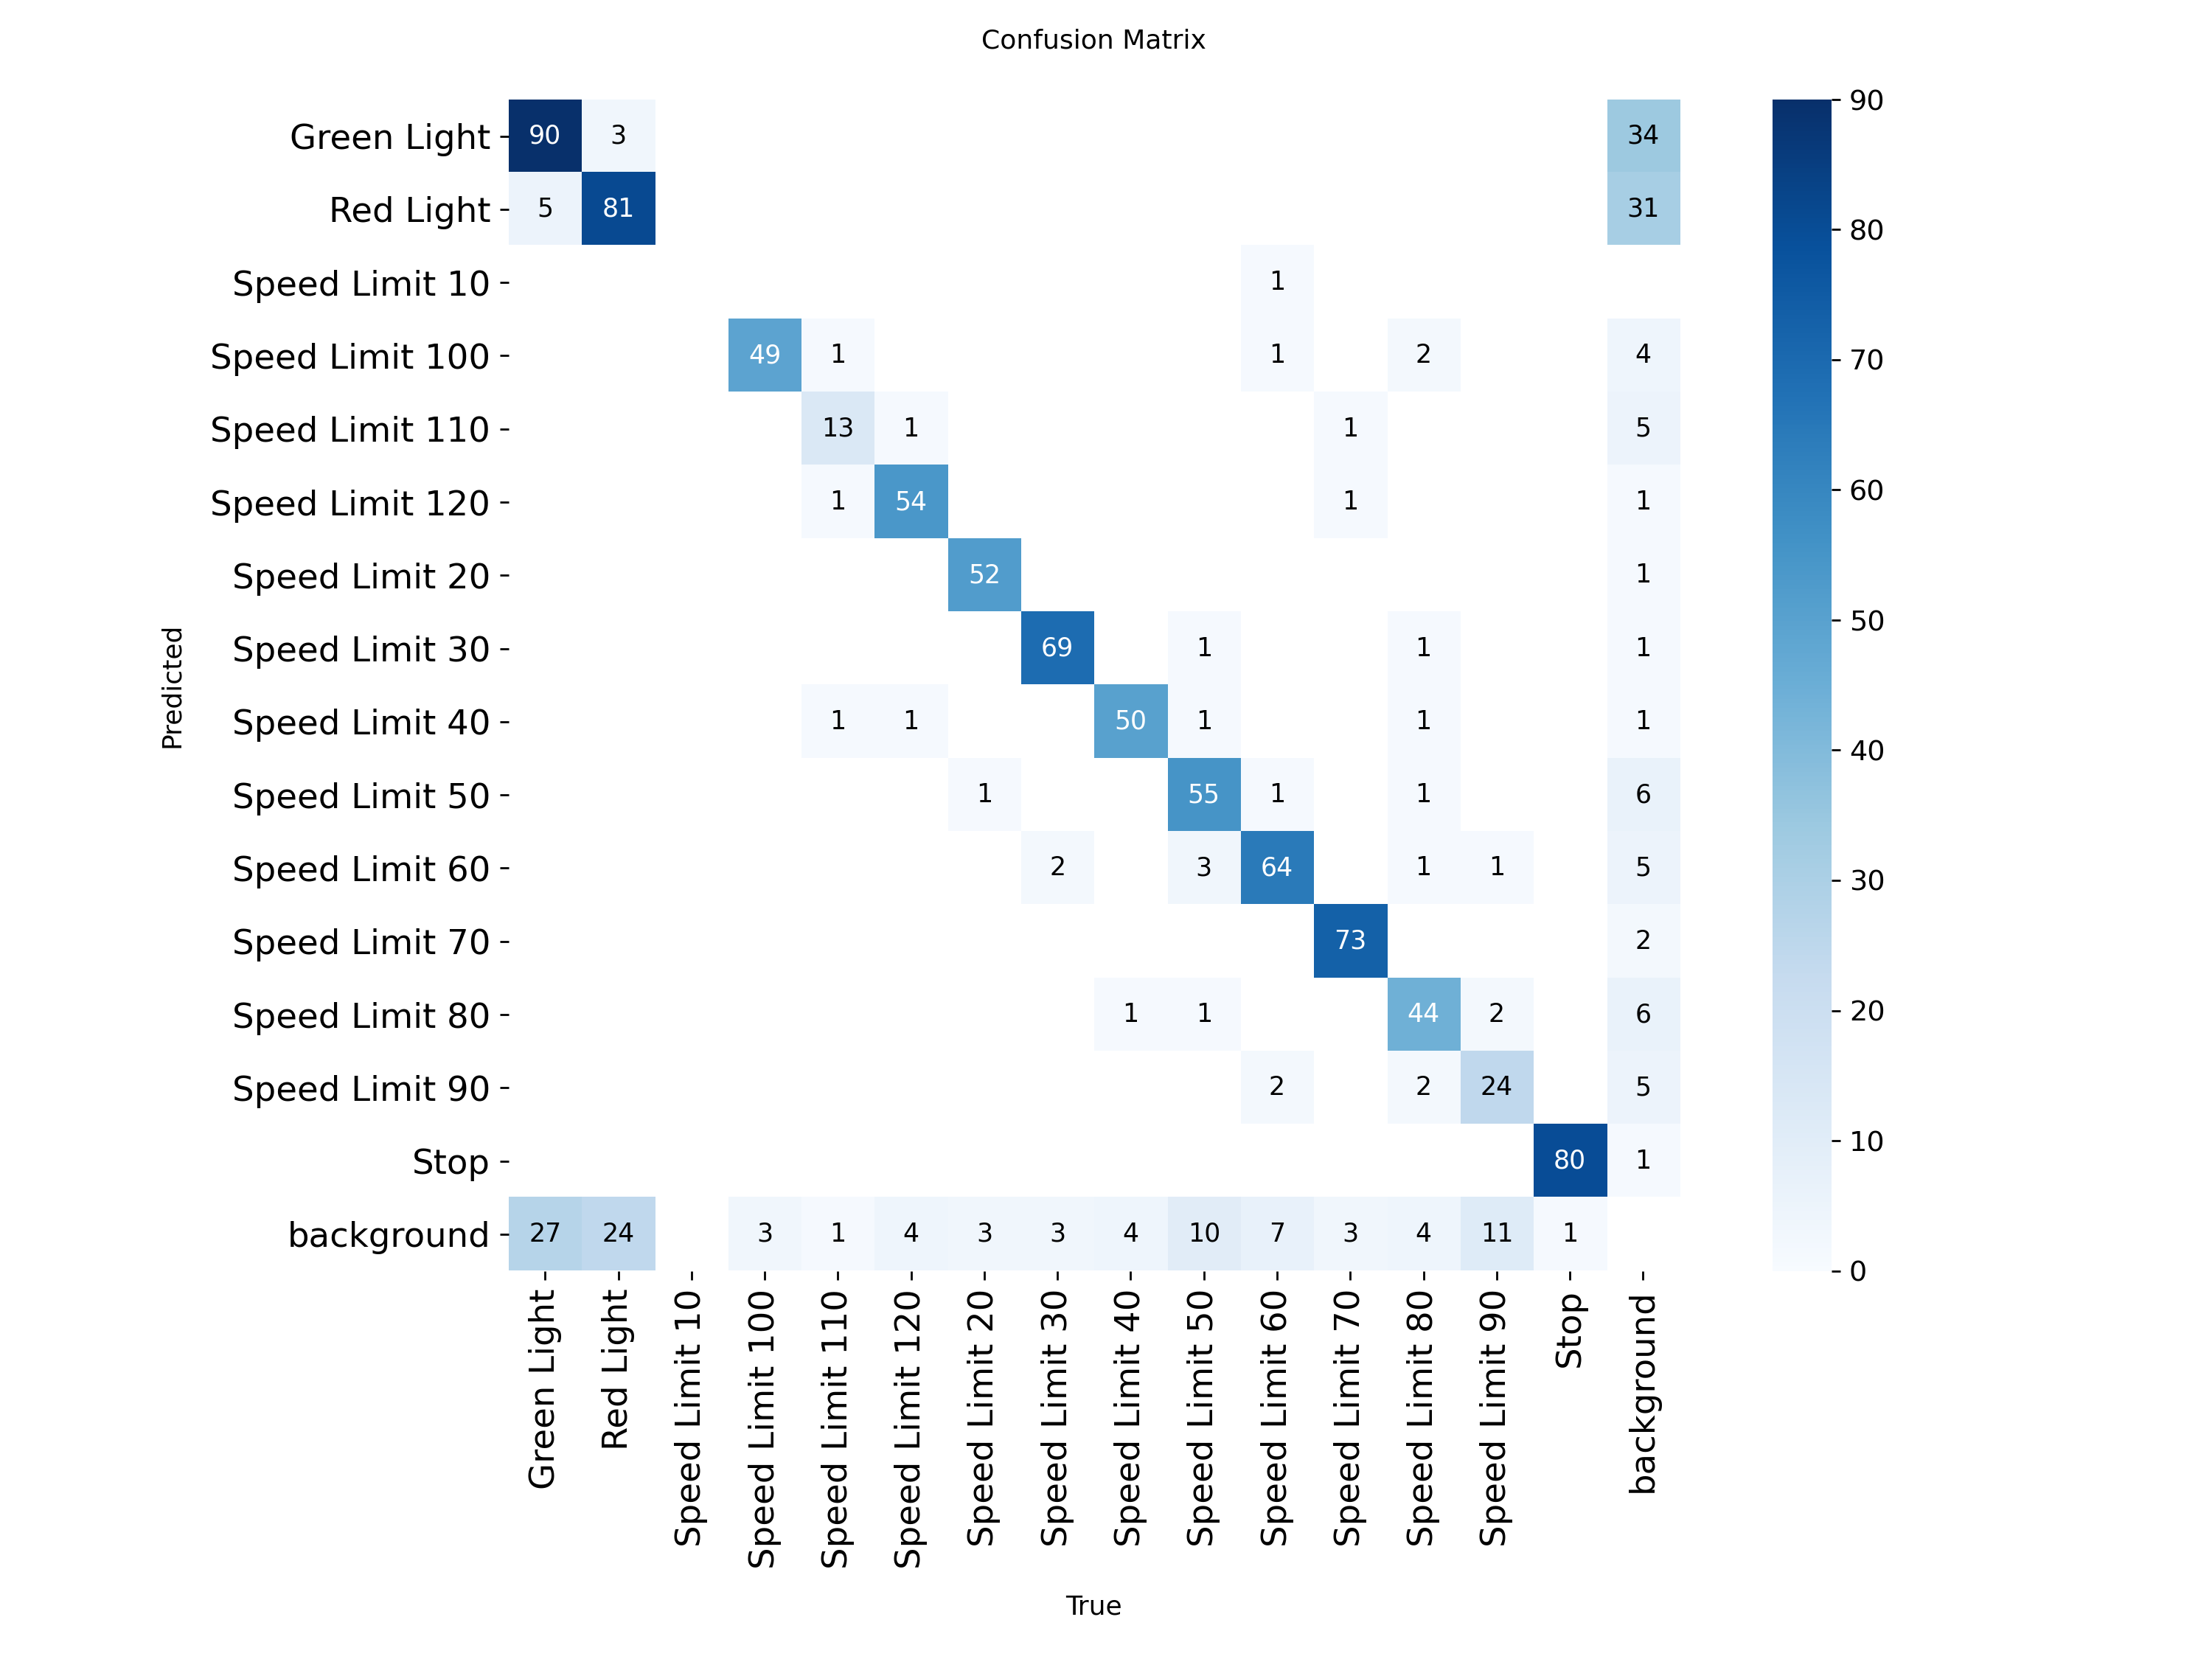

In [26]:
resultData = "/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/"
from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')


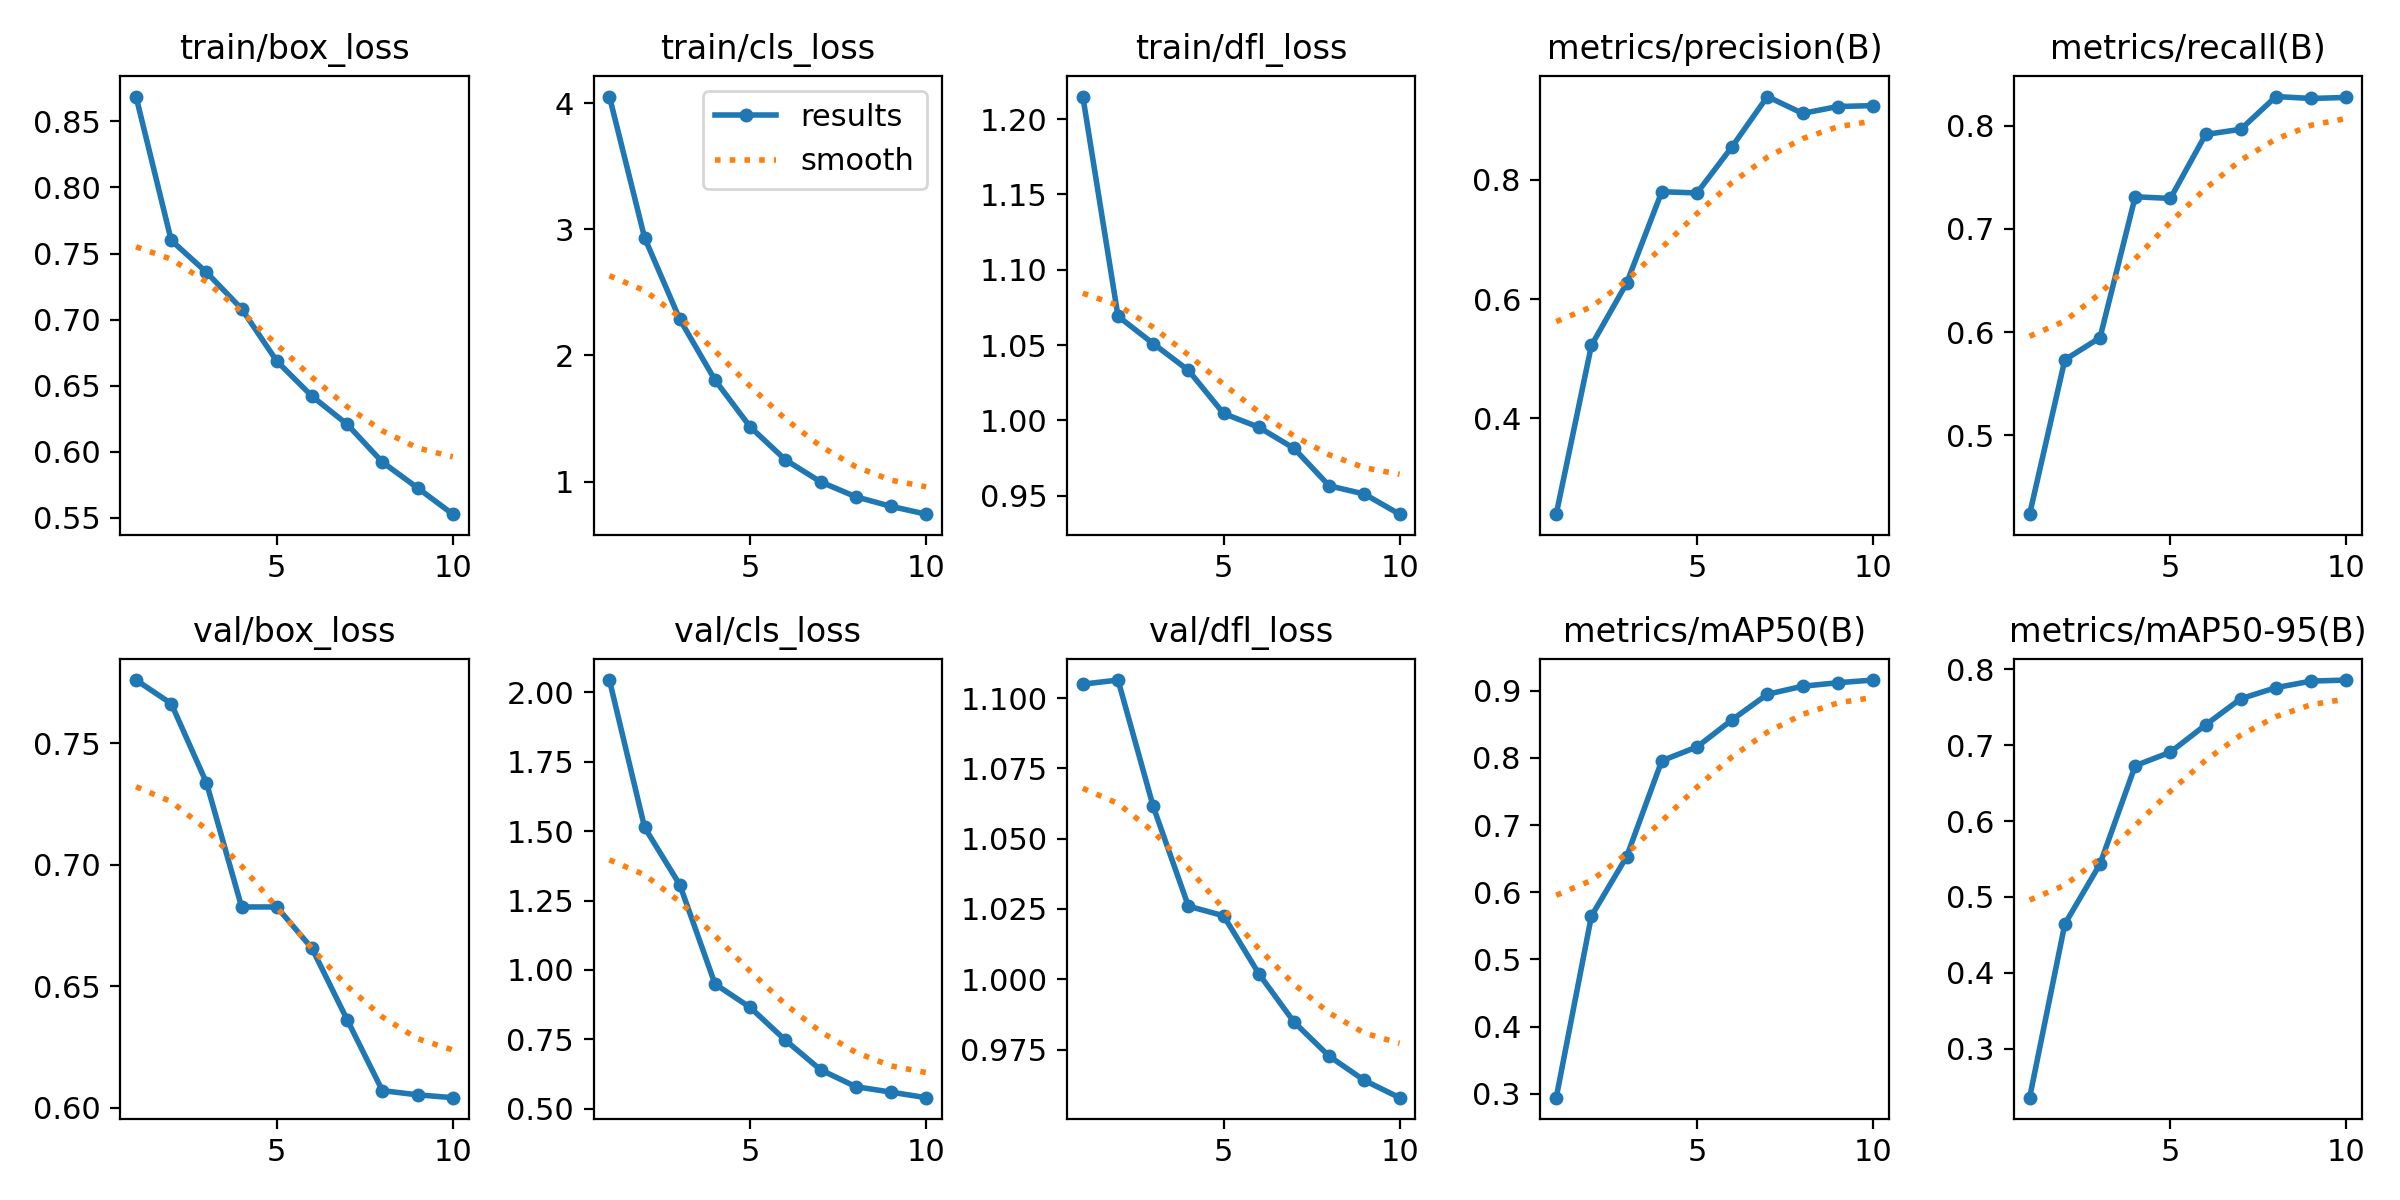

In [27]:
Image(filename = f'{resultData}results.png')

### Test the model on any arbitrary video/images containing road signs

#### 1. Images from test dataset:

In [38]:
import glob
import random

# Get all images
all_images = glob.glob("/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/*")

# Randomly pick 5 images
sample_images = random.sample(all_images, 5)

# Save them to a .txt file
with open("sample5.txt", "w") as f:
    for img in sample_images:
        f.write(img + "\n")

!cat sample5.txt


/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/00014_00010_00017_png.rf.10f5ad5e297030721e4521481f8ca702.jpg
/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/road691_png.rf.3ca3931933e5623e51596577124c3447.jpg
/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/00000_00003_00019_png.rf.d5f22619ed92e72b6d2ed7150b2db7c3.jpg
/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/000287_jpg.rf.a4143ed52df9779f0f27104daf6a8762.jpg
/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/000786_jpg.rf.60798d12643d9be450731115c76bd86c.jpg


In [39]:
weightsPath = "/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source="sample5.txt"

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/5 /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/00000_00003_00019_png.rf.d5f22619ed92e72b6d2ed7150b2db7c3.jpg: 640x640 1 Speed Limit 20, 7.5ms
image 2/5 /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/00014_00010_00017_png.rf.10f5ad5e297030721e4521481f8ca702.jpg: 640x640 1 Stop, 7.4ms
image 3/5 /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/000287_jpg.rf.a4143ed52df9779f0f27104daf6a8762.jpg: 640x640 1 Speed Limit 40, 1 Stop, 7.4ms
image 4/5 /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/000786_jpg.rf.60798d12643d9be450731115c76bd86c.jpg: 640x640 1 Speed Limit 60, 7.4ms
image 5/5 /kaggle/working/RoadSignDetection/Self-Driving-Cars-6/test/images/road691_png.rf.3ca3931933e5623e51596577124c3447.jpg: 640x640 1 Speed Limit 100, 1 Speed Limit 120, 7

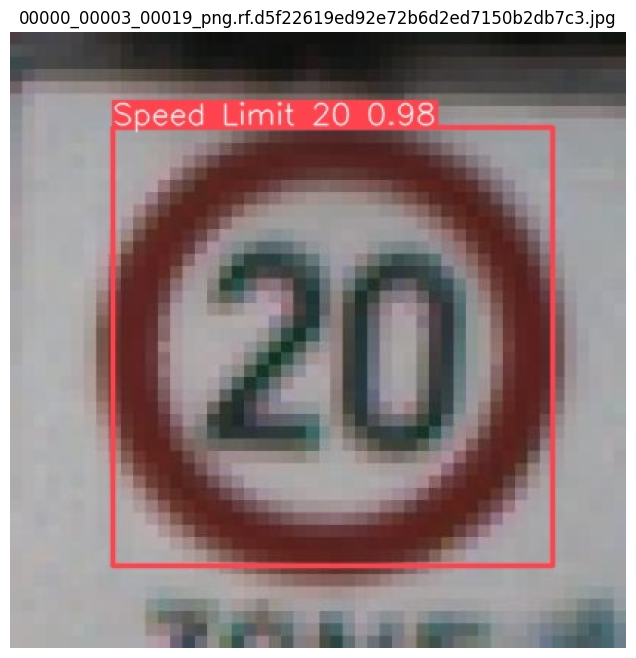

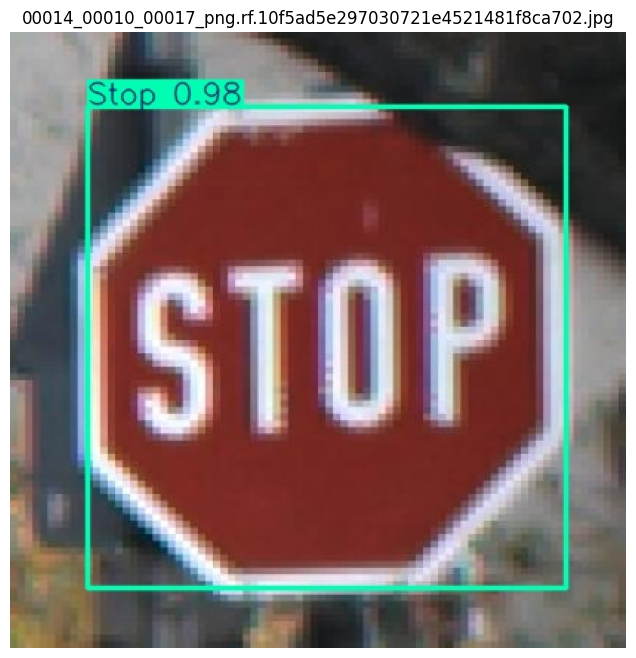

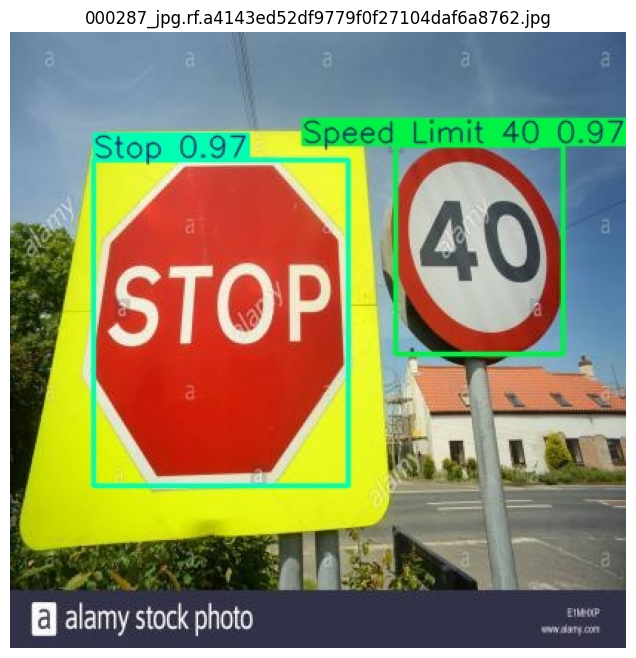

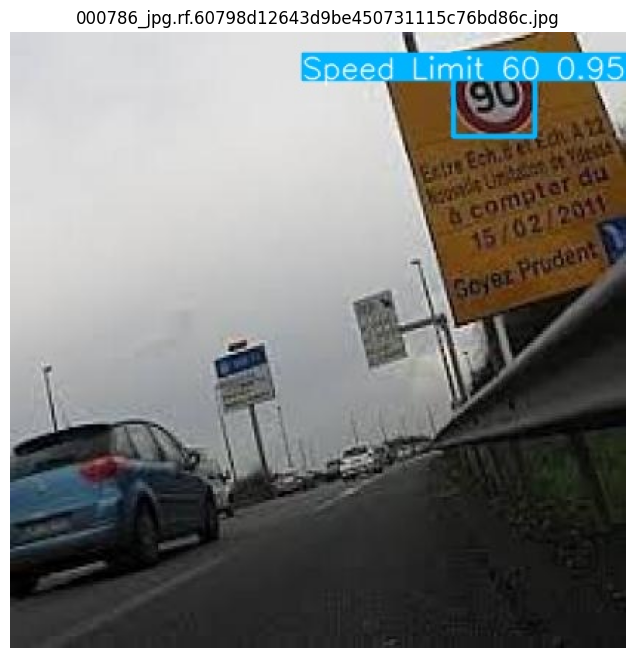

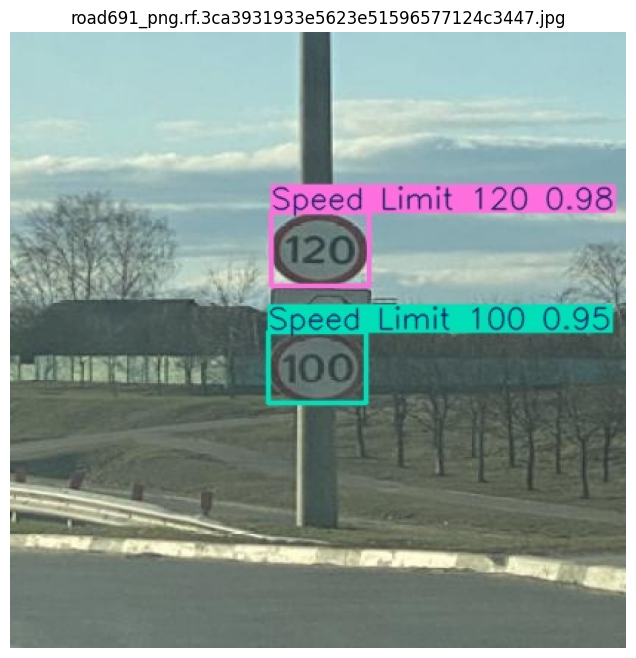

In [41]:
import matplotlib.pyplot as plt
result_dir = "/kaggle/working/RoadSignDetection/Self-Driving-Cars-6/runs/detect/predict2"
from PIL import Image

# Get all predicted images
result_images = sorted(glob.glob(result_dir + "/*.jpg"))

for img_path in result_images:
    img = Image.open(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_path.split("/")[-1])
    plt.show()


#### 2. Video from Youtube:

#### 3. Manually downloaded images:

In [42]:
%pwd

'/kaggle/working/RoadSignDetection/Self-Driving-Cars-6'

In [43]:
os.chdir("/kaggle/working/RoadSignDetection/")

In [44]:
%pwd

'/kaggle/working/RoadSignDetection'

In [45]:
# Create folder for your images
os.makedirs("Manual downloaded images", exist_ok=True)

In [46]:
os.chdir("/kaggle/working/RoadSignDetection/Manual downloaded images")

In [47]:
%pwd

'/kaggle/working/RoadSignDetection/Manual downloaded images'

In [56]:
speed_limit= "/kaggle/input/manual-downloaded-images/speed_limit.jpg"
stop_sign="/kaggle/input/manual-downloaded-images/stop_sign.jpg"
traffic_light="/kaggle/input/manual-downloaded-images/traffic_lights.jpg"

In [57]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source={speed_limit}
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source={stop_sign}
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source={traffic_light}

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/manual-downloaded-images/speed_limit.jpg: 480x640 1 Speed Limit 40, 34.6ms
Speed: 4.0ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /kaggle/working/RoadSignDetection/Manual downloaded images/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/manual-downloaded-images/stop_sign.jpg: 480x640 1 Stop, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /kaggle/working/RoadSignDetection/Manual downloaded images/runs/detect/predict5
💡 Learn more at https://docs.ultralytic

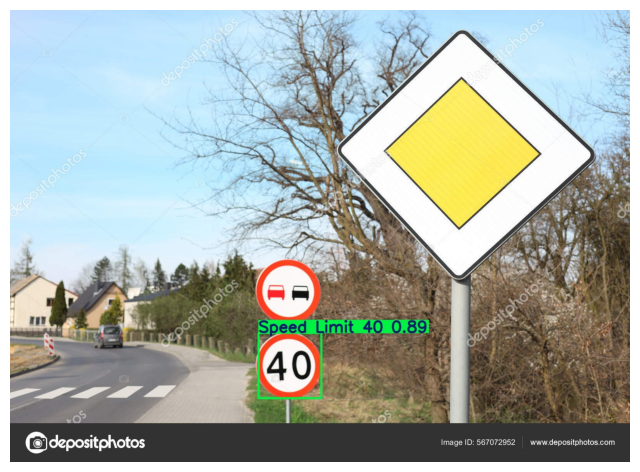

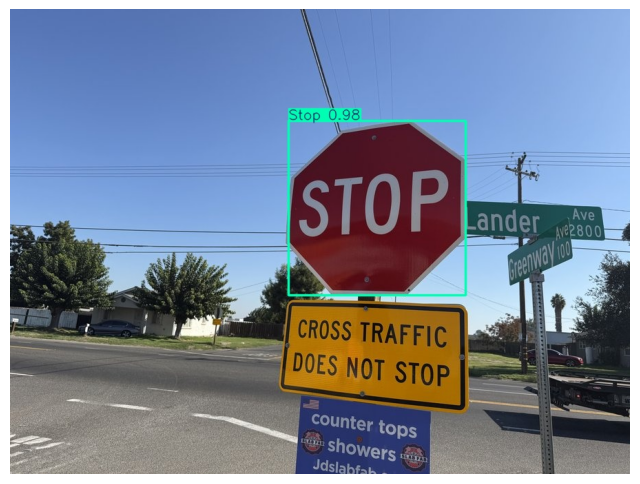

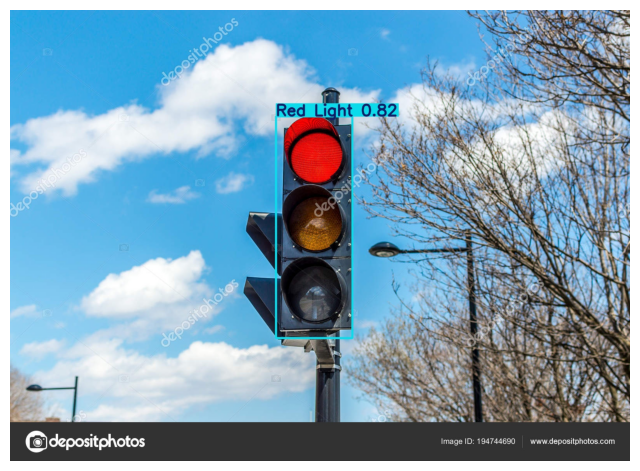

In [58]:
# Paths to YOLO prediction folders
predict_folders = [
    "/kaggle/working/RoadSignDetection/Manual downloaded images/runs/detect/predict4",
    "/kaggle/working/RoadSignDetection/Manual downloaded images/runs/detect/predict5",
    "/kaggle/working/RoadSignDetection/Manual downloaded images/runs/detect/predict6"
]

# Loop through each folder and display the image
for folder in predict_folders:
    # YOLO saves predicted images as *.jpg
    result_images = glob.glob(folder + "/*.jpg")
    for img_path in result_images:
        img = Image.open(img_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
